In [357]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Cargar Datos

In [358]:
data = pd.read_csv('../data/INvideos_cc50.csv')

C:\Users\rodri\AppData\Local\Temp\ipykernel_10988\242698420.py:1: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/INvideos_cc50.csv')


In [359]:
categories = pd.read_json('../data/IN_category_id.json')

## Inspeccionar los Datos

In [360]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38533 entries, 0 to 38532
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                38528 non-null  object 
 1   trending_date           37617 non-null  object 
 2   title                   37535 non-null  object 
 3   channel_title           37422 non-null  object 
 4   category_id             37389 non-null  object 
 5   publish_time            37376 non-null  object 
 6   tags                    37364 non-null  object 
 7   views                   37357 non-null  object 
 8   likes                   37352 non-null  float64
 9   dislikes                37352 non-null  float64
 10  comment_count           37352 non-null  float64
 11  thumbnail_link          37352 non-null  object 
 12  comments_disabled       37352 non-null  object 
 13  ratings_disabled        37352 non-null  object 
 14  video_error_or_removed  37352 non-null

In [361]:
data.describe()

,likes,dislikes,comment_count,lat,lon
count,3.735200e+04,3.735200e+04,37352.00000,38533.000000,38533.000000
mean,2.708272e+04,1.665082e+03,2676.99743,22.659994,82.153458
std,9.714510e+04,1.607617e+04,14868.31713,6.806052,7.461992
min,0.000000e+00,0.000000e+00,0.00000,8.900373,72.636867
25%,8.640000e+02,1.080000e+02,81.00000,19.250232,76.569993
50%,3.069000e+03,3.260000e+02,329.00000,23.835404,78.570026
75%,1.377425e+04,1.019250e+03,1285.00000,27.333330,88.616647
max,2.912710e+06,1.545017e+06,827755.00000,34.299959,94.216667


In [362]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966.0,798.0,882.0,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,FALSO,FALSO,FALSO,Presenting Sharry Mann latest Punjabi Song Cu...,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878)
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735.0,904.0,0.0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,VERDADERO,FALSO,FALSO,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878)
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011.0,243.0,149.0,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,FALSO,FALSO,FALSO,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,Dadra And Nagar Haveli,20.266578,73.016618,POINT (73.01661780000001 20.26657819)
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353.0,1624.0,2684.0,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,FALSO,FALSO,FALSO,This video showcases the difference between pe...,Nagaland,25.666998,94.116570,POINT (94.11657019 25.6669979)
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492.0,293.0,66.0,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,FALSO,FALSO,FALSO,why Samantha became EMOTIONAL @ Samantha naga ...,Himachal Pradesh,31.100025,77.166597,POINT (77.16659704 31.10002545)


Observaciones:

* trending_date está en formato año, dia, mes
* Es necesario convertir a dato booleano o numérico los campos con categorías verdadero o falso

In [363]:
categories = pd.read_json('../data/IN_category_id.json')

In [364]:
categories.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
1,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
2,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
3,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
4,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."


In [365]:
categories = pd.json_normalize(categories['items'])

In [366]:
categories.head()

,kind,etag,id,snippet.channelId,snippet.title,snippet.assignable
0,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKm...",1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/UZ1oLIIz2dxIhO45Z...",2,UCBR8-60-B28hp2BmDPdntcQ,Autos & Vehicles,True
2,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
3,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/HwXKamM1Q20q9BN-o...",15,UCBR8-60-B28hp2BmDPdntcQ,Pets & Animals,True
4,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/9GQMSRjrZdHeb1OEM...",17,UCBR8-60-B28hp2BmDPdntcQ,Sports,True


In [367]:
# Creamos variables ficticias para las caracteristicas "Sex" y "Embarked"
#sex = pd.get_dummies(data['Sex'],drop_first=True)
#embark = pd.get_dummies(data['Embarked'],drop_first=True)

##  Pre-Procesar los Datos

In [368]:
# a fecha: trending_date , publish_time | yyyy-mm-dd 
# con hora: publish_time
# separar en 2 columnas float: geometry
# VERDADERO |	FALSO	boolean : ratings_disabled , comments_disabled , video_error_or_removed
# int : views
# eliminar ? : thumbnail_link , title , description
# describir categoria : category_id
# a categoría ?? : channel_title , state
# ??? tags

### Comprobación de datos faltantes

Comenzamos eliminando la columna "description" porque la data no nos servirá para el desarrollo del trabajo.

In [369]:
data.drop(columns=['description'], inplace=True)

### Observación de datos faltantes

<AxesSubplot:>

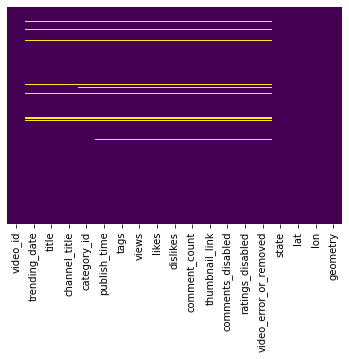

In [370]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [371]:
data[data.isnull().any(axis=1)]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,state,lat,lon,geometry
116,\nசசிகலா மூலம் போயஸ்கார்டனுக்குள் போய் அதிகாரம...,மகாதேவன்,டி.டி.வி.தினகரன்,பாஸ்கரன்,சுதாகரன்,ராஜராஜன்,குலோத்துங்கன்,டாக்டர்.வெங்கடேஷ் என பலருமே இப்போது ரெய்டு வள...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Delhi,28.669993,77.230004,POINT (77.23000403 28.6699929)
117,\nஇளவரசியின் மகன் விவேக் தலையெடுத்து இரண்டு ஆண...,அவர் சேர்த்து வைத்த பணமே கண்டமாகி விட்டது.சசி...,ஜெயலலிதாவின் ஹைதராபாத் திராட்சைத் தோட்டத்தைக்...,தனது மகள்கள்,மகனோடு போயஸ்தோட்டத்தில் தஞ்சமடைந்தார் இளவரசி. ...,புனேயில் எம்பிஏ முடித்து விட்டு பெங்களூருவில்...,2014ஆம் ஆண்டு அங்கிருந்து விலகினார்.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uttaranchal,30.320409,78.050006,POINT (78.05000565 30.32040895)
118,\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mizoram,23.710399,92.720015,POINT (92.72001461000001 23.71039899)
119,\n Ilavarasi's son Vivek is facing a severe cr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Goa,15.491997,73.818001,POINT (73.81800065 15.491997)
120,\n\nOneindia Tamil\nSubscribe for More Videos....,Support,Subscribe▬▬▬▬▬▬▬▬▬\n♥ subscribe :https://www....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Karnataka,12.570381,76.919997,POINT (76.91999711 12.57038129)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38255,Visit WWE.com: http://goo.gl/akf0J4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jharkhand,23.800393,86.419986,POINT (86.41998572 23.80039349)
38256,Must-See WWE videos on YouTube: https://goo.gl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West Bengal,22.580390,88.329947,POINT (88.32994665 22.58039044)
38480,Subscribe to WWE on YouTube: http://bit.ly/1i6...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Madhya Pradesh,21.300391,76.130019,POINT (76.13001949 21.30039105)
38481,Visit WWE.com: http://goo.gl/akf0J4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Delhi,28.669993,77.230004,POINT (77.23000403 28.6699929)


### Limpieza de datos repetidos

In [372]:
#Visualizacion de registros duplicados
data[data.duplicated(
    subset=["video_id","title","channel_title","trending_date","publish_time","views","likes"],
    keep=False)].sort_values(by=["video_id","title","channel_title","trending_date","publish_time","views","likes"])

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,state,lat,lon,geometry
38191,#NAME?,18.13.06,#DeepthiSunaina Cheema joke chepthe navvali..N...,Star Maa,24.0,2018-06-12T05:44:19.000Z,"comedy|""action""|""entertainment""|""telugu""|""toll...",675923.0,4642.0,908.0,920.0,https://i.ytimg.com/vi/-fKW38f_0Hk/default.jpg,FALSO,FALSO,FALSO,Kerala,8.900373,76.569993,POINT (76.56999263 8.900372741)
38314,#NAME?,18.13.06,#DeepthiSunaina Cheema joke chepthe navvali..N...,Star Maa,24.0,2018-06-12T05:44:19.000Z,"comedy|""action""|""entertainment""|""telugu""|""toll...",675923.0,4642.0,908.0,920.0,https://i.ytimg.com/vi/-fKW38f_0Hk/default.jpg,FALSO,FALSO,FALSO,Maharashtra,19.250232,73.160175,POINT (73.16017493 19.25023195)
38372,#NAME?,18.14.06,#DeepthiSunaina Cheema joke chepthe navvali..N...,Star Maa,24.0,2018-06-12T05:44:19.000Z,"comedy|""action""|""entertainment""|""telugu""|""toll...",1014376.0,5974.0,1414.0,1132.0,https://i.ytimg.com/vi/-fKW38f_0Hk/default.jpg,FALSO,FALSO,FALSO,Haryana,28.450006,77.019991,POINT (77.01999101 28.45000633)
38497,#NAME?,18.14.06,#DeepthiSunaina Cheema joke chepthe navvali..N...,Star Maa,24.0,2018-06-12T05:44:19.000Z,"comedy|""action""|""entertainment""|""telugu""|""toll...",1014376.0,5974.0,1414.0,1132.0,https://i.ytimg.com/vi/-fKW38f_0Hk/default.jpg,FALSO,FALSO,FALSO,Meghalaya,25.570492,91.880014,POINT (91.88001420000001 25.57049217)
33145,#NAME?,18.16.05,2018 Karnataka Election Results With Arnab Gos...,Republic World,25.0,2018-05-15T05:00:27.000Z,"karnataka elections 2018|""karnataka elections ...",333692.0,1316.0,408.0,157.0,https://i.ytimg.com/vi/-jYTsolMGUg/default.jpg,FALSO,FALSO,FALSO,Maharashtra,19.250232,73.160175,POINT (73.16017493 19.25023195)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chhattisgarh,22.090420,82.159987,POINT (82.15998734 22.09042035)
37925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West Bengal,22.580390,88.329947,POINT (88.32994665 22.58039044)
37928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tamil Nadu,12.920386,79.150042,POINT (79.15004187 12.92038576)
37931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sikkim,27.333330,88.616647,POINT (88.6166475 27.3333303)


Se observa que existen varios datos duplicados en el dataset. Se pasará a elminar los datos duplicados y nos quedaremos con el ultimo registro.

#### Eliminación de datos duplicados

In [373]:
data.drop_duplicates(
    subset=["video_id","title","channel_title","trending_date","publish_time","views","likes"],
    keep="last", inplace=True)
    

Se utilizó como criterio para eleminar los datos duplicados por el "video_id", "title", "channel_title" y "publish_time". Esto se debe a que si presenta el mismo ID, mismo título y el mismo nombre del canal y misma hora y fecha de publicación se puede decir con seguridad que se trata del mismo video.

### Estandarización de tipo de datos

In [374]:
import datetime

In [375]:
data['publish_time'] = pd.to_datetime(data['publish_time'],errors="coerce")

In [376]:
data['trending_date'] = pd.to_datetime(data['trending_date'],format="%y.%d.%m",errors="coerce")

In [377]:
#data['comments_disabled'].apply( vf_to_boolean )
data[['ratings_disabled','comments_disabled', 'video_error_or_removed']
] = data[['ratings_disabled','comments_disabled',
  'video_error_or_removed']].applymap(
  lambda x : True if x == 'VERDADERO' else False if x == 'FALSO'
  else np.NaN )

In [378]:
data[['ratings_disabled','comments_disabled', 'video_error_or_removed']] = data[['ratings_disabled','comments_disabled', 'video_error_or_removed']].astype("bool")

In [379]:
data['views'] = pd.to_numeric(data['views'],errors="coerce",downcast='integer')
data[['views','likes','dislikes','comment_count']] = data[['views','likes','dislikes','comment_count']].astype('Int64')

In [380]:
# separar en 2 columnas float: geometry?

In [381]:
categories['snippet.title'] = categories['snippet.title'].astype("category")
categories['snippet.title']

0         Film & Animation
1         Autos & Vehicles
2                    Music
3           Pets & Animals
4                   Sports
5             Short Movies
6          Travel & Events
7                   Gaming
8            Videoblogging
9           People & Blogs
10                  Comedy
11           Entertainment
12         News & Politics
13           Howto & Style
14               Education
15    Science & Technology
16                  Movies
17         Anime/Animation
18        Action/Adventure
19                Classics
20                  Comedy
21             Documentary
22                   Drama
23                  Family
24                 Foreign
25                  Horror
26          Sci-Fi/Fantasy
27                Thriller
28                  Shorts
29                   Shows
30                Trailers
Name: snippet.title, dtype: category
Categories (30, object): ['Action/Adventure', 'Anime/Animation', 'Autos & Vehicles', 'Classics', ..., 'Thriller', 'Trailers', 

### Limpieza de datos NA

In [382]:
#Si el dato faltante es el video_id, entonces, se removerán dichas observaciones.

In [383]:
data.dropna(subset = ["video_id"], axis = 0, inplace = True)

#### Comprobamos datos nulos dentro del dataframe

In [384]:
data[data.isnull().any(axis=1)]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,state,lat,lon,geometry
116,\nசசிகலா மூலம் போயஸ்கார்டனுக்குள் போய் அதிகாரம...,NaT,டி.டி.வி.தினகரன்,பாஸ்கரன்,சுதாகரன்,NaT,குலோத்துங்கன்,<NA>,<NA>,<NA>,<NA>,NaN,True,True,True,Delhi,28.669993,77.230004,POINT (77.23000403 28.6699929)
117,\nஇளவரசியின் மகன் விவேக் தலையெடுத்து இரண்டு ஆண...,NaT,ஜெயலலிதாவின் ஹைதராபாத் திராட்சைத் தோட்டத்தைக்...,தனது மகள்கள்,மகனோடு போயஸ்தோட்டத்தில் தஞ்சமடைந்தார் இளவரசி. ...,NaT,2014ஆம் ஆண்டு அங்கிருந்து விலகினார்.,<NA>,<NA>,<NA>,<NA>,NaN,True,True,True,Uttaranchal,30.320409,78.050006,POINT (78.05000565 30.32040895)
119,\n Ilavarasi's son Vivek is facing a severe cr...,NaT,NaN,NaN,NaN,NaT,NaN,<NA>,<NA>,<NA>,<NA>,NaN,True,True,True,Goa,15.491997,73.818001,POINT (73.81800065 15.491997)
586,\nഇന്ത്യന്‍ സിനിമാ ആരാധകരെ മുഴുവന്‍ കോരിത്തരിപ...,NaT,Support,Subscribe▬▬▬▬▬▬▬▬▬\n♥ subscribe : https://goo...,NaN,NaT,NaN,<NA>,<NA>,<NA>,<NA>,NaN,True,True,True,Lakshadweep,10.562573,72.636867,POINT (72.63686717 10.56257331)
959,\nஜெயலலிதா உயிருடன் இருந்த போது அவருடனேயே இருந...,NaT,கிருஷ்ணப்ரியா,விவேக் 3 பேருமே போயஸ் கார்டனில் வளர்ந்தவர்கள்...,NaN,NaT,NaN,<NA>,<NA>,<NA>,<NA>,NaN,True,True,True,Sikkim,27.333330,88.616647,POINT (88.6166475 27.3333303)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37935,Current affairs playlist-,NaT,NaN,NaN,NaN,NaT,NaN,<NA>,<NA>,<NA>,<NA>,NaN,True,True,True,Tripura,23.835404,91.279999,POINT (91.27999914 23.83540428)
37936,https://www.youtube.com/watch?v=ZFy9-nslWQk&li...,NaT,NaN,NaN,NaN,NaT,NaN,<NA>,<NA>,<NA>,<NA>,NaN,True,True,True,Maharashtra,19.250232,73.160175,POINT (73.16017493 19.25023195)
38480,Subscribe to WWE on YouTube: http://bit.ly/1i6...,NaT,NaN,NaN,NaN,NaT,NaN,<NA>,<NA>,<NA>,<NA>,NaN,True,True,True,Madhya Pradesh,21.300391,76.130019,POINT (76.13001949 21.30039105)
38481,Visit WWE.com: http://goo.gl/akf0J4,NaT,NaN,NaN,NaN,NaT,NaN,<NA>,<NA>,<NA>,<NA>,NaN,True,True,True,Delhi,28.669993,77.230004,POINT (77.23000403 28.6699929)


In [385]:
data[data.isnull().any(axis=1)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 116 to 38482
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                231 non-null    object             
 1   trending_date           0 non-null      datetime64[ns]     
 2   title                   72 non-null     object             
 3   channel_title           35 non-null     object             
 4   category_id             19 non-null     object             
 5   publish_time            0 non-null      datetime64[ns, UTC]
 6   tags                    8 non-null      object             
 7   views                   0 non-null      Int64              
 8   likes                   0 non-null      Int64              
 9   dislikes                0 non-null      Int64              
 10  comment_count           0 non-null      Int64              
 11  thumbnail_link          0 non-null      o

Por ultimo eliminamos los datos que tengan NA en "publish_time" y "trending_date"

In [395]:
data.dropna(subset=["publish_time","trending_date"],inplace=True)

In [396]:
data[data.isnull().any(axis=1)]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,state,lat,lon,geometry


### Datos procesados

In [388]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,state,lat,lon,geometry
0,kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12 12:20:39+00:00,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878)
1,zUZ1z7FwLc8,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13 05:43:56+00:00,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878)
2,10L1hZ9qa58,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12 15:48:08+00:00,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Dadra And Nagar Haveli,20.266578,73.016618,POINT (73.01661780000001 20.26657819)
3,N1vE8iiEg64,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12 07:08:48+00:00,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,Nagaland,25.666998,94.116570,POINT (94.11657019 25.6669979)
4,kJzGH0PVQHQ,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13 01:14:16+00:00,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,Himachal Pradesh,31.100025,77.166597,POINT (77.16659704 31.10002545)


In [389]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33106 entries, 0 to 38532
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                33106 non-null  object             
 1   trending_date           33106 non-null  datetime64[ns]     
 2   title                   33106 non-null  object             
 3   channel_title           33106 non-null  object             
 4   category_id             33106 non-null  object             
 5   publish_time            33106 non-null  datetime64[ns, UTC]
 6   tags                    33106 non-null  object             
 7   views                   33106 non-null  Int64              
 8   likes                   33106 non-null  Int64              
 9   dislikes                33106 non-null  Int64              
 10  comment_count           33106 non-null  Int64              
 11  thumbnail_link          33106 non-null  o

In [390]:
data.describe()

,views,likes,dislikes,comment_count,lat,lon
count,3.310600e+04,3.310600e+04,3.310600e+04,33106.000000,33106.000000,33106.000000
mean,9.936712e+05,2.550963e+04,1.571959e+03,2518.346433,22.671406,82.113516
std,3.140401e+06,9.626428e+04,1.688946e+04,14760.556050,6.819211,7.448237
min,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,8.900373,72.636867
25%,1.125612e+05,7.860000e+02,9.700000e+01,72.000000,19.250232,76.569993
50%,2.745020e+05,2.751000e+03,2.890000e+02,297.000000,23.835404,78.570026
75%,7.307798e+05,1.199475e+04,9.300000e+02,1165.750000,27.333330,88.616647
max,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,34.299959,94.216667


In [391]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   kind                31 non-null     object  
 1   etag                31 non-null     object  
 2   id                  31 non-null     object  
 3   snippet.channelId   31 non-null     object  
 4   snippet.title       31 non-null     category
 5   snippet.assignable  31 non-null     bool    
dtypes: bool(1), category(1), object(4)
memory usage: 2.4+ KB


### Requerimientos

#### Por Categoría de Videos

In [392]:
data.columns.values

array(['video_id', 'trending_date', 'title', 'channel_title',
       'category_id', 'publish_time', 'tags', 'views', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed', 'state', 'lat',
       'lon', 'geometry'], dtype=object)

In [393]:
data_cat = data.join(categories.set_index('id'), on='category_id')
data_cat.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,video_error_or_removed,state,lat,lon,geometry,kind,etag,snippet.channelId,snippet.title,snippet.assignable
0,kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12 12:20:39+00:00,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,...,False,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878),youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKm...",UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,zUZ1z7FwLc8,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13 05:43:56+00:00,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,...,False,Arunachal Pradesh,27.100399,93.616601,POINT (93.61660071 27.10039878),youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/QiLK0ZIrFoORdk_g2...",UCBR8-60-B28hp2BmDPdntcQ,News & Politics,True
2,10L1hZ9qa58,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12 15:48:08+00:00,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,...,False,Dadra And Nagar Haveli,20.266578,73.016618,POINT (73.01661780000001 20.26657819),youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/UVB9oxX2Bvqa_w_y3...",UCBR8-60-B28hp2BmDPdntcQ,Entertainment,True
3,N1vE8iiEg64,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12 07:08:48+00:00,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,...,False,Nagaland,25.666998,94.116570,POINT (94.11657019 25.6669979),youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/G9LHzQmx44rX2S5ya...",UCBR8-60-B28hp2BmDPdntcQ,Comedy,True
4,kJzGH0PVQHQ,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13 01:14:16+00:00,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,...,False,Himachal Pradesh,31.100025,77.166597,POINT (77.16659704 31.10002545),youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/UVB9oxX2Bvqa_w_y3...",UCBR8-60-B28hp2BmDPdntcQ,Entertainment,True


##### 1. ¿Qué categorías de videos son las de mayor tendencia?

<AxesSubplot:xlabel='snippet.title', ylabel='views'>

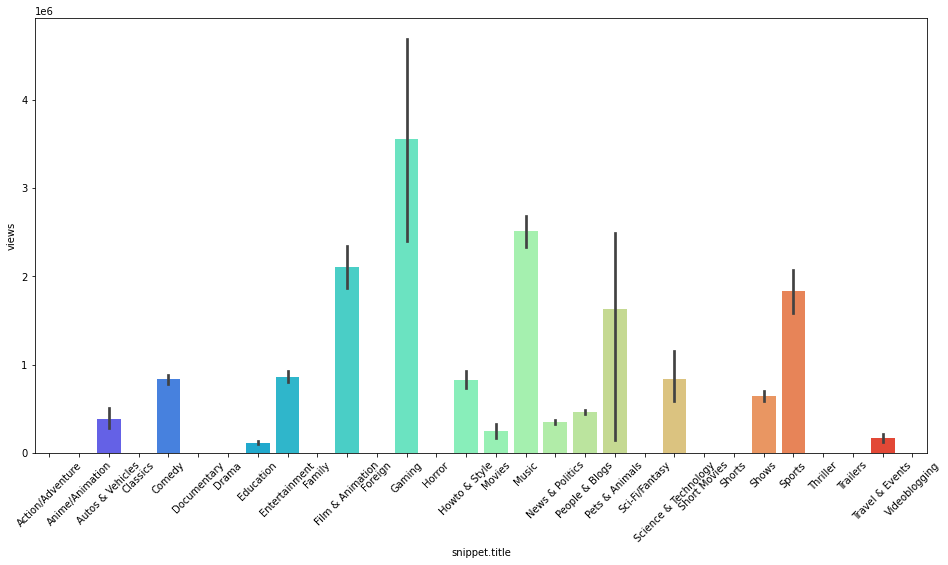

In [394]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=45)
sns.barplot(x="snippet.title", y="views", data=data_cat, palette='rainbow')

Se utilizó la cantidad de vistas como el indicador de tendencia. Como se observa en el gráfico, las tres primeras categorías con mayor tendencia son: Gaming, Music, Family

##### 2. ¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?

##### 3. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Me gusta” / “No me gusta”?

##### 4. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” / “Comentarios”?

##### 4. ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” / “Comentarios”?

#### Por el tiempo transcurrido

##  Visualizar los Datos